In [1]:
from google.colab import files
uploaded = files.upload()

Saving Europe Hotel Booking Satisfaction Score.csv to Europe Hotel Booking Satisfaction Score.csv


In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/Europe Hotel Booking Satisfaction Score.csv')
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [8]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
purpose_of_travel,0
Type of Travel,0
Type Of Booking,0
Hotel wifi service,0
Departure/Arrival convenience,0
Ease of Online booking,0
Hotel location,0


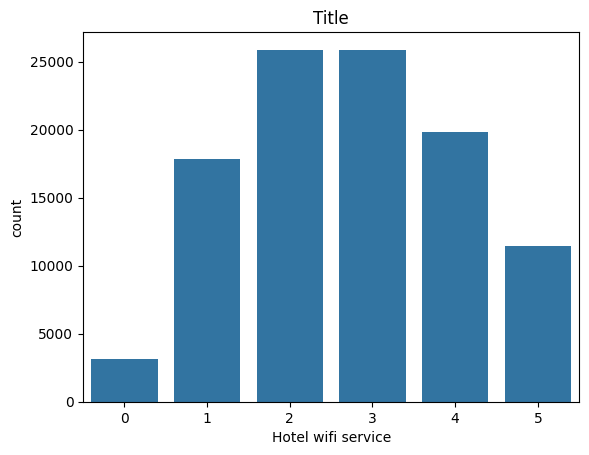

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Hotel wifi service', data = df)
plt.title('Title')
plt.show()

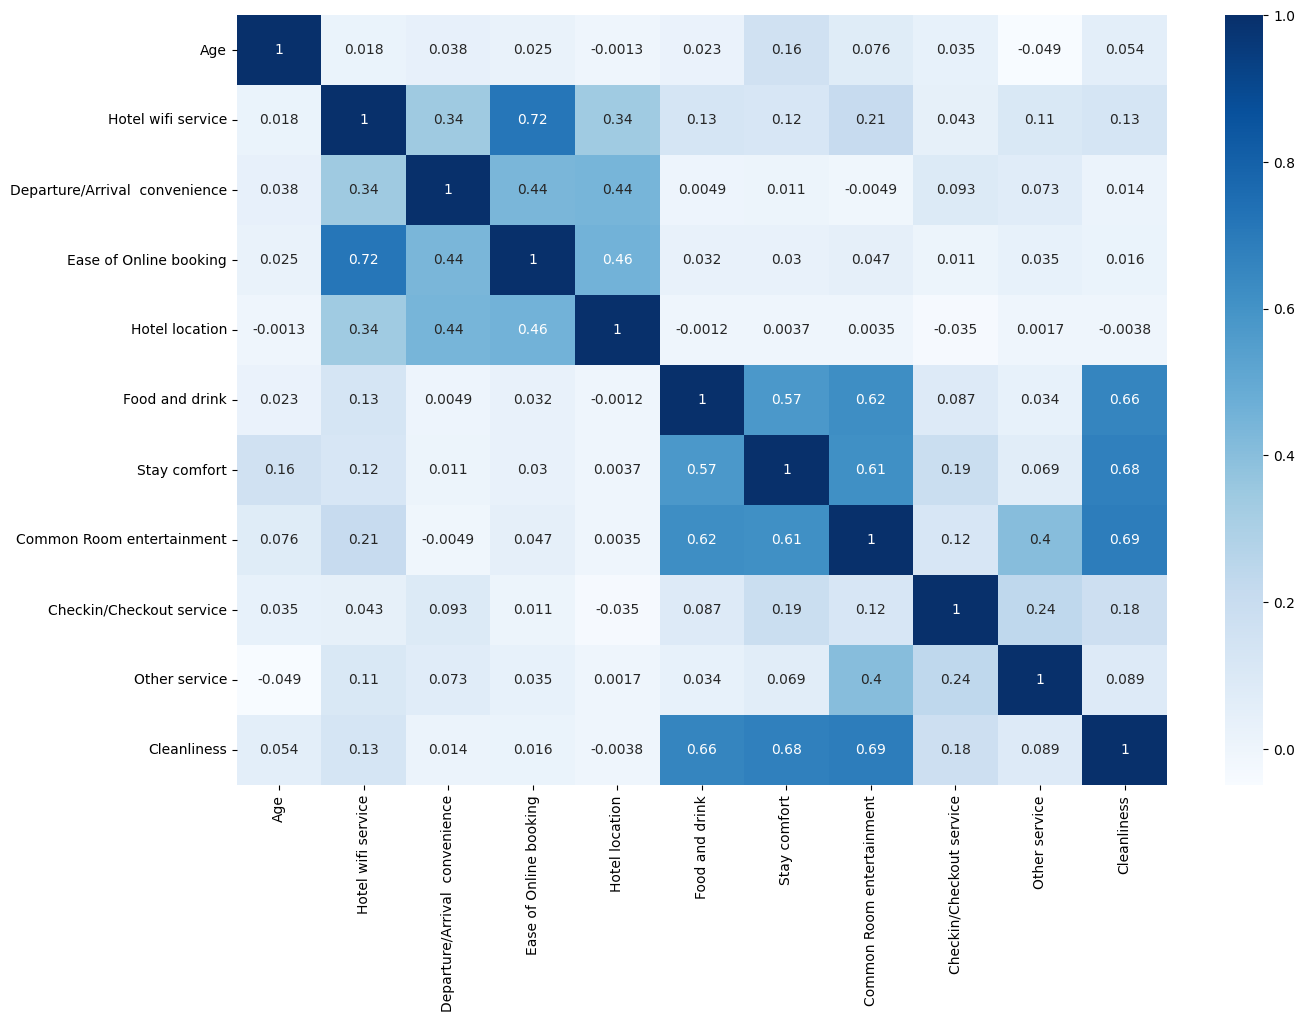

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, 1:].corr(numeric_only = True), annot = True, cmap = 'Blues')
plt.show()

In [17]:
x = df.iloc[:, 6:16]
y = df.iloc[:, -1]

In [18]:
from sklearn.preprocessing import LabelEncoder
y0 = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(y0)
print(y)

[0 0 1 ... 0 0 0]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

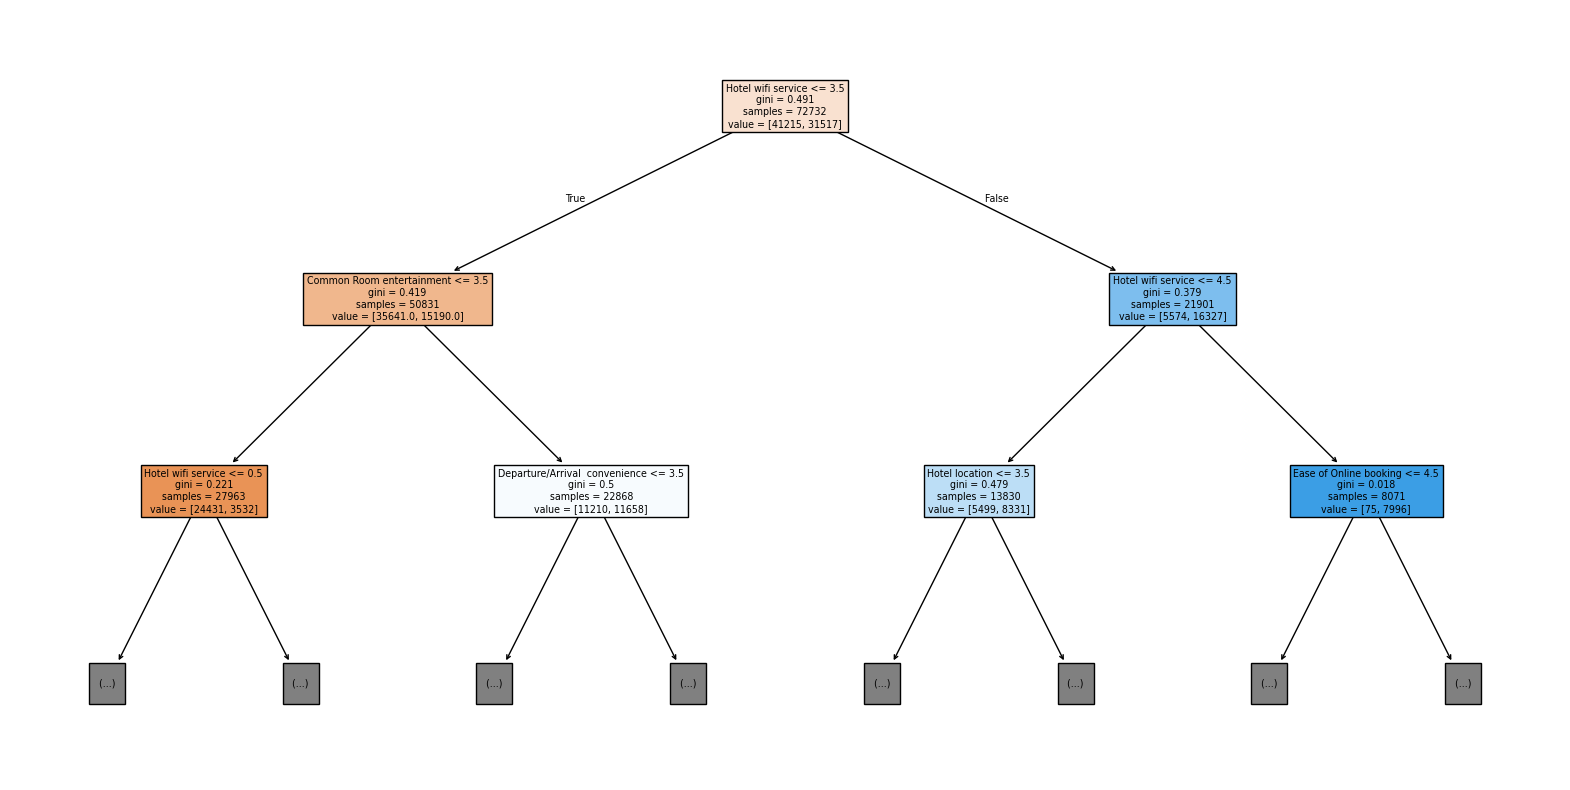

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 10))
plot_tree(model, feature_names = x.columns, max_depth = 2, filled = True)
plt.show()

featur importances :  [0.37547322 0.15210824 0.02198045 0.11024981 0.0250713  0.04255261
 0.13415398 0.04307964 0.0645347  0.03079605]


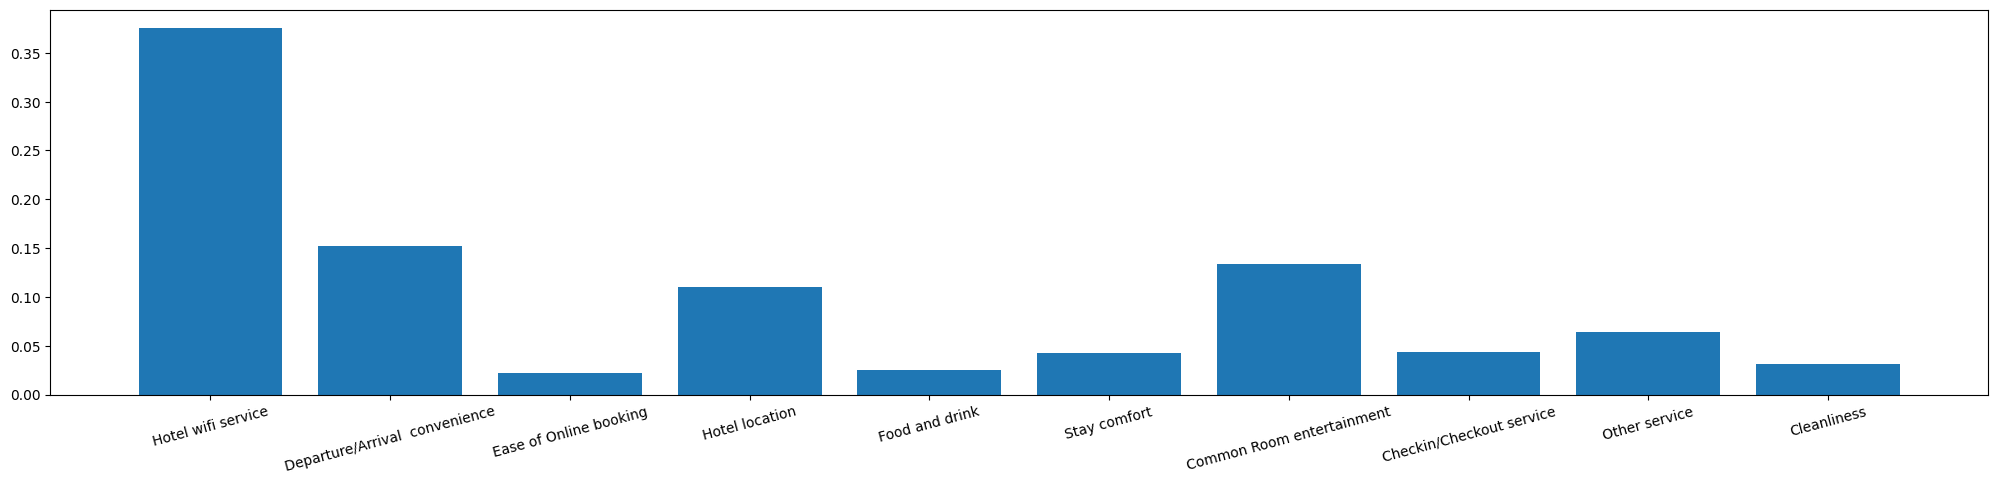

In [30]:
import numpy as np
print("featur importances : ", model.feature_importances_)

n_features = x_train.shape[1]
plt.figure(figsize=(25,5))
plt.bar(np.arange(n_features), model.feature_importances_)
plt.xticks(np.arange(n_features), df.columns[6:16], rotation = 15)
plt.show()

In [31]:
#76p 까지했음

In [32]:
print("훈련 데이터를 이용한 모델 분류 정확도 : ", model.score(x_train, y_train))

훈련 데이터를 이용한 모델 분류 정확도 :  0.9651597646153


In [34]:
print(np.arange(n_features))

[0 1 2 3 4 5 6 7 8 9]


In [35]:
print("테스트 데이터 성능평가 : ", model.score(x_test, y_test))

테스트 데이터 성능평가 :  0.909887078147055


In [40]:
prediction = model.predict(x_test)
print(prediction[:5])
print(y_test[:5])

[1 0 0 1 1]
[1 0 0 1 1]


In [45]:
from sklearn.metrics import confusion_matrix

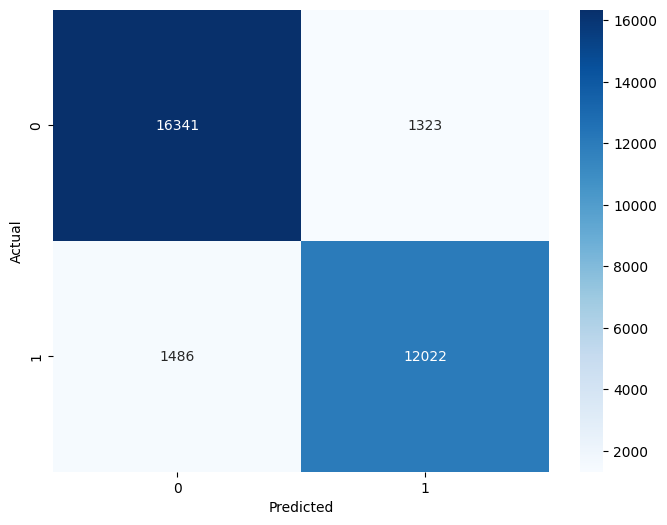

In [46]:
prediction = model.predict(x_test)
conf = confusion_matrix(y_test, prediction)

plt.figure(figsize = (8, 6))
sns.heatmap(conf, annot = True, cmap='Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
from google.colab import files
uploaded = files.upload()

Saving hotel_satisfaction_new.csv to hotel_satisfaction_new.csv


In [50]:
df_new = pd.read_csv('/content/hotel_satisfaction_new.csv')
df_new.head()

,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
0,5,4,5,3,5,5,4,4,4,5
1,1,2,3,2,1,3,3,2,3,2


In [51]:
print(model.predict(df_new))

[1 0]
